In [1]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        try:
            unique_vals = DataFrame[column].unique()
            num_unique = DataFrame[column].nunique()
        except TypeError:
            unique_vals = 'Column contains multiple lists'
            num_unique = 'ERROR'

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

# Analyst Job Scraping / Analyzing

## CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

# Acquisition

- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings. (With duplicates)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Read in job_scrapes

df = pd.read_csv('../support_files/working_docs/jobs.csv').replace("'", "", regex=True)

In [4]:
df.description_tokens = df.description_tokens.str.strip("[]").str.split(",")

In [5]:
check_columns(df)

Total rows: 33864
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33864,0,0.00000,"RangeIndex(start=0, stop=33864, step=1)",None
1,Unnamed: 0,int64,33864,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 33863, 16931.5)"
2,index,int64,3451,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3450, 1127.241967871486)"
3,title,object,13048,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8146,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24077,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5491,0,0.00000,"[[21 hours ago, Full-time, Health insurance, D...",None
9,job_id,object,33844,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


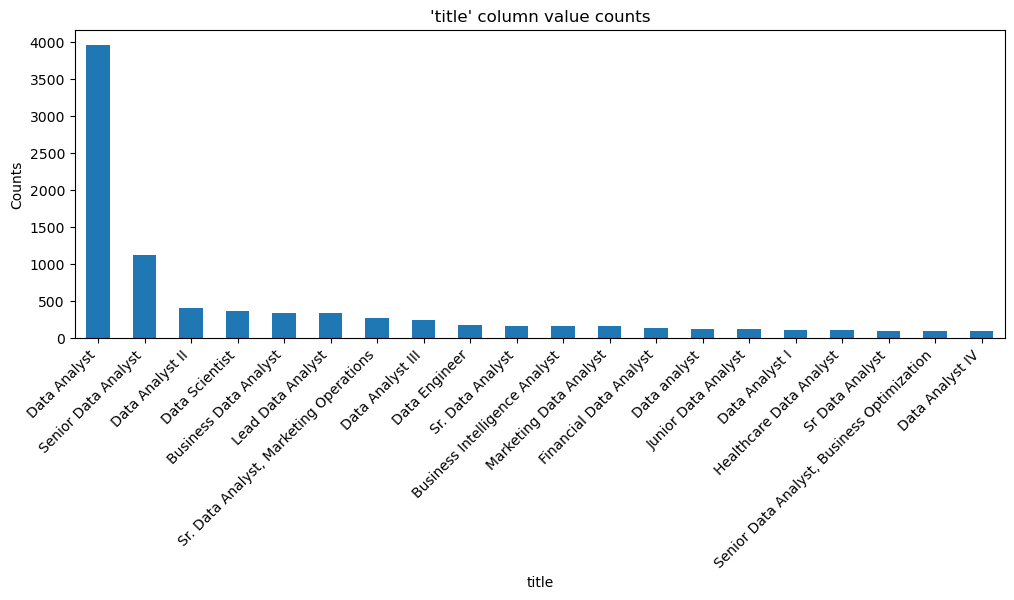

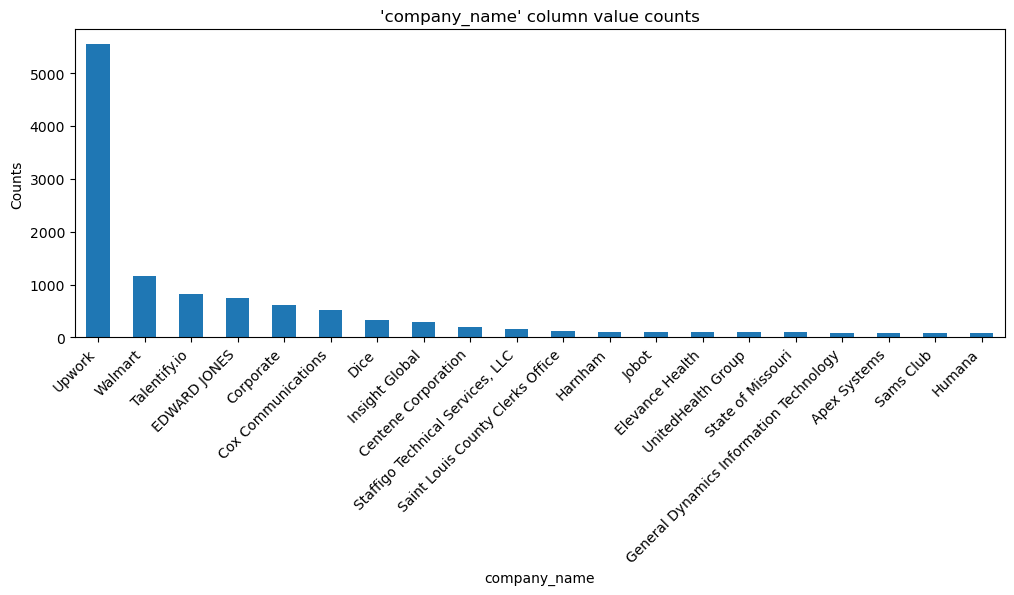

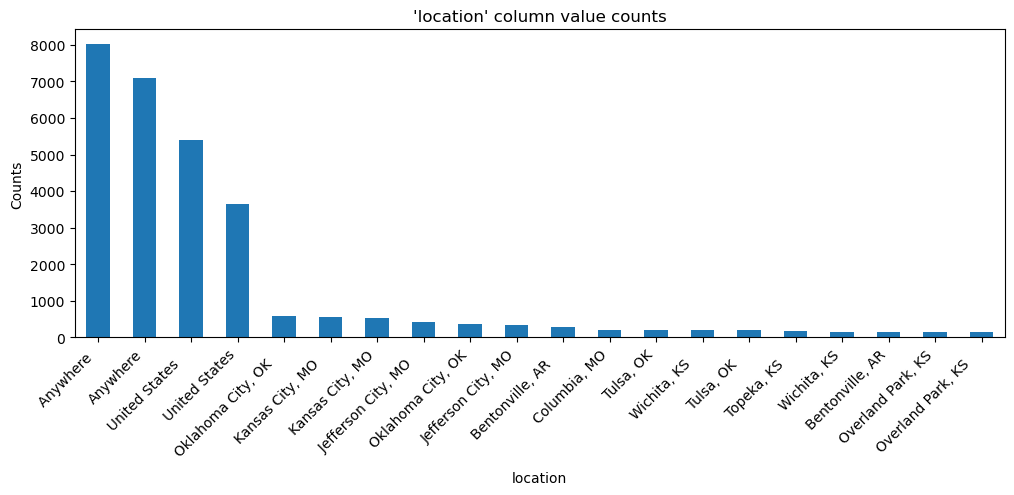

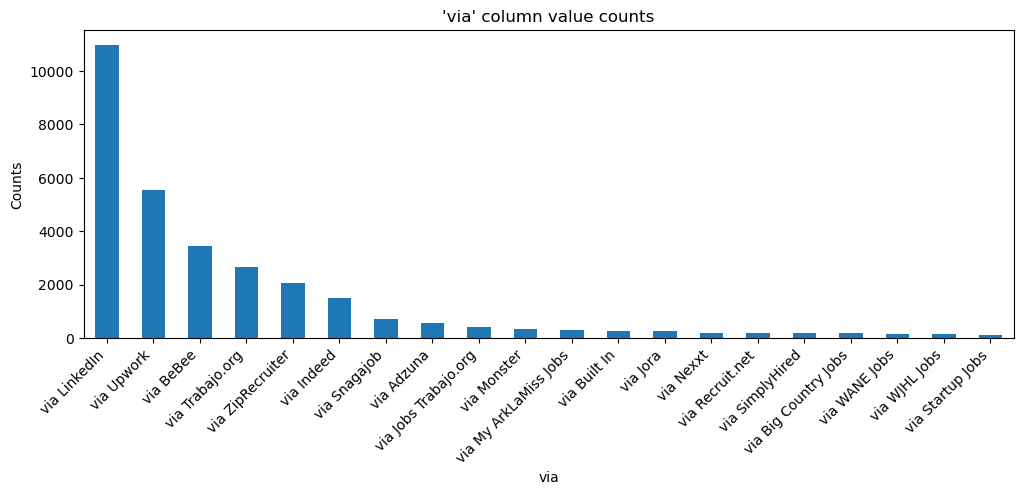

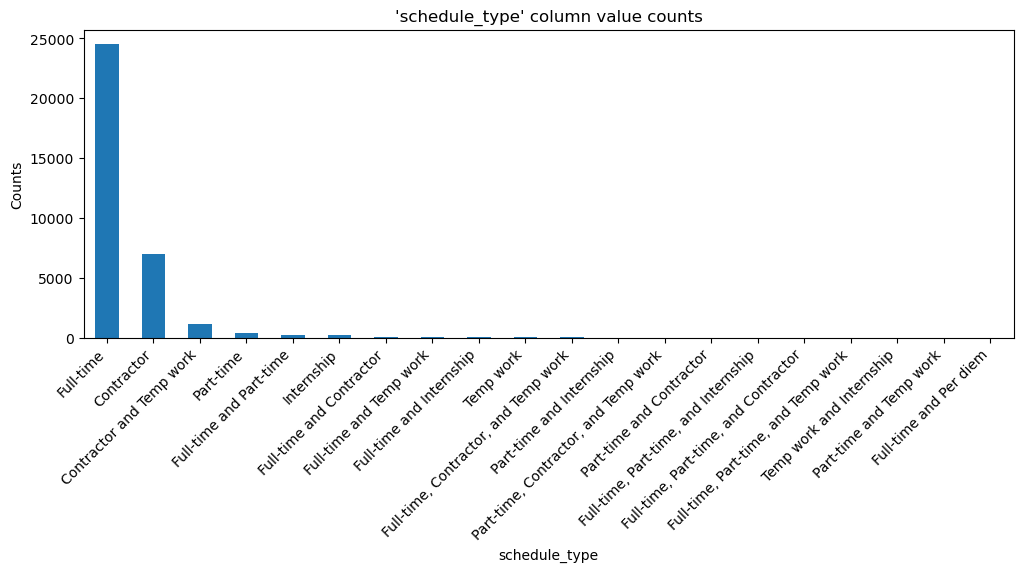

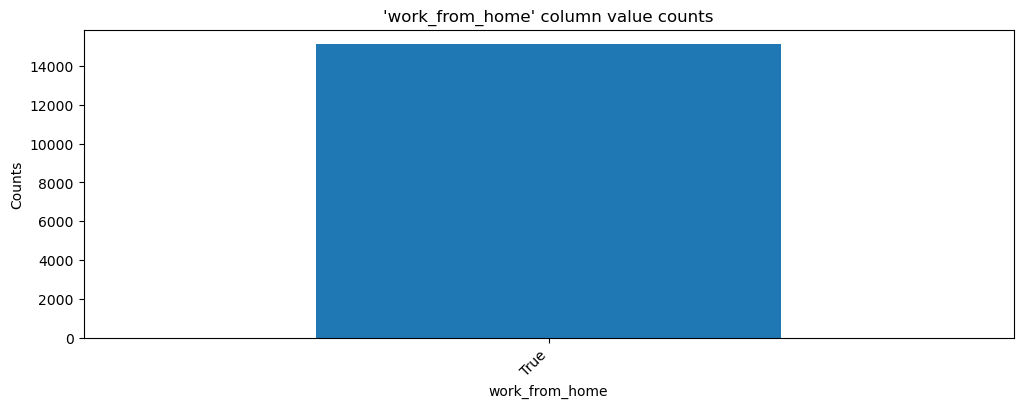

In [6]:
def eda_plot(column, topn=20):
    plt.figure(figsize=(12, 4))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title', 'company_name', 'location', 'via', 'schedule_type', 'work_from_home']

for column in columns:
        eda_plot(column)

- Further exploration and feature development would be tokenization of popular data science/analyst/engineering skills

- Seeing what are the most requested skills for each

- Seeing what are the most highly compensated skills (using only job postings with pay listed)

- Narrowing down locations where each job type (maybe skills?) are in demand

- Although the data in this case was provided and will be continuously updated, I'd like to make my own webscraper (or API usage)
to pull new data (with Google's job search API or scraping - I am looking to gain experience with Selenium)

- To validate accuracy of data, we could use a regression model to predict pay based on location/skills

- We could also potentially use a classification model to predict the location, job type (analyst/scientist/engineer), based on other features.

- **<u>Ideally if everything else goes well, a deliverable I would really like to include would be a dashboard with drop downs for skills/locations/job title, to demonstrate full stack data science capabilities**

# README WORK

## Overview

##### We downloaded the data from Kaggle as a .csv

1. Decide how to clean / prep the data.

2. Text Preprocessing

2. Explore Separately to see the data from different angles.

3. Feature Extraction

4. Model Training

5. Reusable Functioinality in the Form of a Dashboard




### Project Goal

The goal is to analyze the Data Analyst/Engineer jobs from various recruiting websites and see if we can find what the most requested skills are and which ones are the most highly compensated skills.



### Project Description

- NLP: To find commonalities in posts.
- Classification: To predict the location, job type, etc. based on other features
- Regression: To predict pay based on location/skills
- Dashboard: Possibly include drop down boxes for skill/locations/job titles to demonstrate full stack data science capabilities

### Initial Questions / Hypothesis

1. What skills are most common between job postings?

2. Which skills pay the most?

3. What are the most common locations for work?

4. 

## Acquire

Data was downloaded from Kaggle as a .csv

Link: https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

## Clean

In [7]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"[21 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, python]"
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","[17 hours ago, Work from home, Contractor, No ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[python, postgresql, mysql, pandas, r, mo..."
2,2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"[12 hours ago, Full-time, Health insurance]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"[10 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, excel, python, power_bi, qlik, word, ..."
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","[18 hours ago, Work from home, Part-time, Heal...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [8]:
df.via.value_counts()

via
via LinkedIn                                 10982
via Upwork                                    5529
via BeBee                                     3435
via Trabajo.org                               2663
via ZipRecruiter                              2048
                                             ...  
via Textron Aviation - Talentify                 1
via Finland                                      1
via GE Jobs                                      1
via HarperCollins Publishers - ICIMS             1
via Performance Contracting Group - ICIMS        1
Name: count, Length: 553, dtype: int64

In [9]:
# check_columns(df, dates=True)

In [10]:
# need to clean up the Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])


In [11]:
# dropping 'index' column, job_id column, job_id column, and commute_time column
df = df.drop(columns=['index', 'commute_time'])

In [12]:
df.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"[21 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, python]"
1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","[17 hours ago, Work from home, Contractor, No ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[python, postgresql, mysql, pandas, r, mo..."
2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"[12 hours ago, Full-time, Health insurance]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"[10 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, excel, python, power_bi, qlik, word, ..."
4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","[18 hours ago, Work from home, Part-time, Heal...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,...,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [13]:
# need to update pandas setting to see all columns
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"[21 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, python]"
1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","[17 hours ago, Work from home, Contractor, No ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[python, postgresql, mysql, pandas, r, mo..."
2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"[12 hours ago, Full-time, Health insurance]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"[10 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, excel, python, power_bi, qlik, word, ..."
4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","[18 hours ago, Work from home, Part-time, Heal...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [15]:
df.date_time = pd.to_datetime(df.date_time)

In [16]:
import datetime

In [18]:
# drop duplicate job_id rows
df = df.drop_duplicates(subset=['job_id'])

In [19]:
df.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"[21 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, python]"
1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","[17 hours ago, Work from home, Contractor, No ...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,Contractor,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[python, postgresql, mysql, pandas, r, mo..."
2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"[12 hours ago, Full-time, Health insurance]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"[10 hours ago, Full-time, Health insurance, De...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,Full-time,NaN,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[r, excel, python, power_bi, qlik, word, ..."
4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","[18 hours ago, Work from home, Part-time, Heal...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,Part-time,True,NaN,data analyst,2023-08-03 03:00:09.849838,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [20]:
check_columns(df)

Total rows: 33844
Total columns: 24


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33844,0,0.00000,"Index([ 0, 1, 2, 3, 4, ...","(0, 33863)"
1,title,object,13048,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
2,company_name,object,8146,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
3,location,object,635,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
4,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
5,description,object,24077,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
6,extensions,object,5491,0,0.00000,"[[21 hours ago, Full-time, Health insurance, D...",None
7,job_id,object,33844,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None
8,thumbnail,object,5931,15036,0.44427,"[nan, https://encrypted-tbn0.gstatic.com/image...",None
9,posted_at,object,80,0,0.00000,"[21 hours ago, 17 hours ago, 12 hours ago, 10 ...",None


In [21]:
df.salary.value_counts()

salary
77K–116K a year           412
40–75 an hour             197
18.33–28.20 an hour       116
15–45 an hour             110
17–50 an hour              92
                         ... 
35–39 an hour               1
62K–72K a year              1
48K–114K a year             1
27.07–53.08 an hour         1
100,815–110,815 a year      1
Name: count, Length: 1303, dtype: int64

In [22]:
df.salary_max.value_counts()

salary_max
75.00        433
116000.00    412
45.00        389
50.00        315
30.00        217
            ... 
23.12          1
258750.00      1
133665.00      1
95458.00       1
110815.00      1
Name: count, Length: 444, dtype: int64

In [23]:
df[['salary', 'salary_min', 'salary_max', 'salary_avg']].sample(20)

,salary,salary_min,salary_max,salary_avg
14839,NaN,NaN,NaN,NaN
25350,NaN,NaN,NaN,NaN
15897,NaN,NaN,NaN,NaN
22908,15–45 an hour,15.0,45.0,30.0
7882,200–250 an hour,200.0,250.0,225.0
466,NaN,NaN,NaN,NaN
25502,NaN,NaN,NaN,NaN
9493,NaN,NaN,NaN,NaN
11566,100K–110K a year,100000.0,110000.0,105000.0
10883,NaN,NaN,NaN,NaN


In [26]:
# def clean(text):
#     wnl = nltk.stem.WordNetLemmatizer()
#     stopwords = nltk.corpus.stopwords.words('english') + ['job', 'title', 'description', 'responsibilities', 'qualifications', 'requirements', 'benefits', 'apply', 'now', 'click', 'here', 'please', 'email', 'us', 'resume', 'cover', 'letter', 'include', 'job', 'title', 'subject', 'line', 'salary', 'range', 'competitive', 'compensation', 'commensurate', 'experience', 'based', 'upon', 'qualifications', 'employment', 'type', 'full-time', 'part-time', 'contract', 'internship', 'temporary', 'location', 'remote', 'work', 'from', 'home', 'telecommute', 'telework', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker']
#     text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
#     words = re.sub(r'[^\w\s]', '', text).split()
#     return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [27]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('wordnet')

# def tokenize_and_lemmatize(text):
#     lemmatizer = WordNetLemmatizer()
#     stopwords = nltk.corpus.stopwords.words('english') + ['job', 'title', 'description', 'responsibilities', 'qualifications', 'requirements', 'benefits', 'apply', 'now', 'click', 'here', 'please', 'email', 'us', 'resume', 'cover', 'letter', 'include', 'job', 'title', 'subject', 'line', 'salary', 'range', 'competitive', 'compensation', 'commensurate', 'experience', 'based', 'upon', 'qualifications', 'employment', 'type', 'full-time', 'part-time', 'contract', 'internship', 'temporary', 'location', 'remote', 'work', 'from', 'home', 'telecommute', 'telework', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker', 'telework', 'teleworker', 'teleworking', 'telecommuting', 'telecommuter', 'teleworker']
#     text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
#     words = re.sub(r'[^\w\s]', '', text).split()
#     tokenized_text = [word_tokenize(words) for word in words if word not in stopwords]
#     lemmatized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
#     return lemmatized_text

In [51]:
import string

In [52]:
from collections import Counter

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure necessary resources are available
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and normalize the descriptions
def tokenize_and_normalize(text):
    tokens = word_tokenize(text)
    # Convert to lowercase and remove punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return tokens

# Apply the function to the description column
tokenized_descriptions = df['description'].apply(tokenize_and_normalize)

[nltk_data] Downloading package punkt to /Users/click/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/click/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def get_common_words(tokenized_descriptions, min_occurrences=100):
    # Count words
    word_counts = Counter()
    tokenized_descriptions.apply(word_counts.update)
    
    # Filter words with more than num_occurrences
    common_words = [(word, count) for word, count in word_counts.items() if count > min_occurrences]
    
    # Convert to DataFrame
    df_common_words = pd.DataFrame(common_words, columns=['word', 'occurrences'])

    # Sort by occurences
    df_common_words.sort_values('occurrences', ascending=False, inplace=True)
    
    return df_common_words

In [56]:
common_words = get_common_words(tokenized_descriptions, min_occurrences=100)
common_words

,word,occurrences
2,data,353944
37,experience,134907
38,business,118472
60,work,87358
77,analysis,66097
...,...,...
4218,issued,101
3638,pixel,101
5008,subsidized,101
2794,remarkable,101


In [57]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql',
]

keywords_ML_Algorithms = [x.lower() for x in ['regression','clustering', 'classification', 'predictive', 'prediction','decision trees',
       'Decision Trees, Random Forests',
       'Convolutional Neural Networks','CNN',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)','DNN',
       'Recurrent Neural Networks','RNN',
       'Transformer Networks (BERT, gpt-3, etc)', 'Graph Neural Networks','Transformer'
       'Autoencoder Networks (DAE, VAE, etc)',
       'Generative Adversarial Networks', 'None',
       'Evolutionary Approaches',] ]

keyword_viz = [x.lower() for x in ['Matplotlib', 'Seaborn', 'Plotly',
       'Ggplot', 'None', 'Shiny', 'Geoplotlib', 'Bokeh',
       'D3 js', 'Other', 'Leaflet / Folium', 'Pygal', 'Altair',
       'Dygraphs', 'Highcharter'] ]

keyword_cvnlp = ['computer vision','natural language processing']

keyword_big_data = ['mysql', 'postgresql', 'microsoft sql', 'sqlite', 'mongodb',
                    'bigquery', 'oracle database', 'azure sql', 'amazon rds', 'google cloud sql', 'snowflake']

keyword_big_data_2 = [x.lower() for x in  ['MySQL ', 'PostgreSQL ', 'Microsoft SQL Server ', 'SQLite ',
       'MongoDB ', 'None', 'Google Cloud BigQuery ', 'Oracle Database ',
       'Microsoft Azure SQL Database ', 'Amazon RDS ',
       'Google Cloud SQL ', 'Snowflake ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'Other', 'IBM Db2 '] ]

keyword_bi = [x.lower() for x in ['tableau',  'Power BI', 'Power_bi', 'Google Data Studio',
       'QuickSight', 'Qlik Sense', 'Other',
       'Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]


keyword_bi_2 = [x.lower() for x in ['tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]


keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora','amazon','ec2','s3',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

In [59]:
from nltk import MWETokenizer

In [60]:
keywords = keywords_programming + keywords_ML_Algorithms + keywords_analyst_tools + keywords_cloud_tools 

jobs_df_cleaned = df[df.description.notnull()] # filter out null values
jobs_df_cleaned = jobs_df_cleaned.reset_index() # throwing index issues if don't reset index
# jobs_df_cleaned = jobs_df_cleaned.head(10) 

jobs_df_cleaned['description_tokens'] = ""
for index, row in jobs_df_cleaned.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_df_cleaned.at[index, 'description_tokens'] = detail

In [63]:
import numpy as np


In [61]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=20):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)

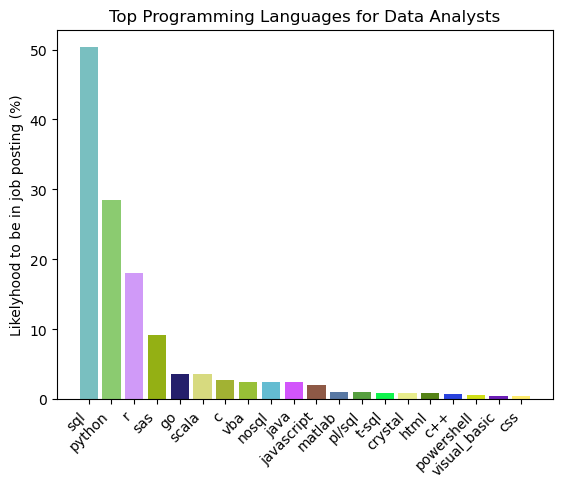

In [64]:
filtered_keywords(jobs_df_cleaned, keywords_programming, title="Top Programming Languages for Data Analysts")

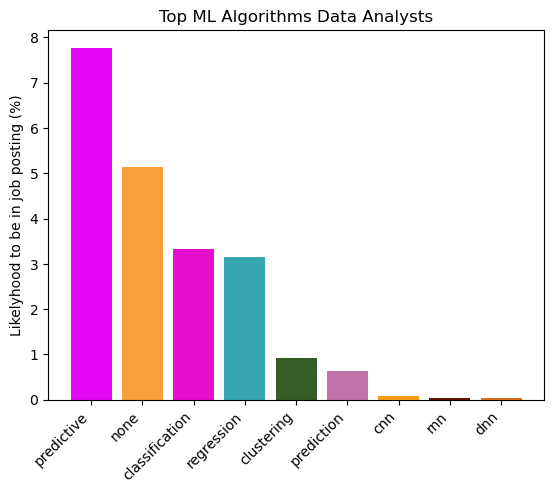

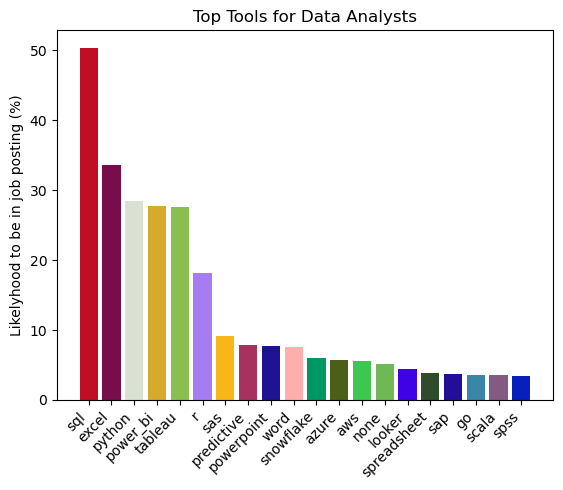

In [65]:
filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="Top ML Algorithms Data Analysts")
filtered_keywords(jobs_df_cleaned, keywords, title="Top Tools for Data Analysts")